In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("churn_data2.csv")
df=df.drop(columns=['name','merchant_id','max_processed_date','order_post_30','max_created_at','solved_at'])

In [3]:
df.head()

,avg_processed,GMV_all,avg_active_days,total_lost_n_damaged,avg_returned,avg_24,avg_24_48,avg_48,is_churn,total_complain,delta
0,1639,1273220,23,0,196,839,133,78,0,7.0,11.0
1,1787,3677696,30,0,27,977,76,16,0,23.0,4.0
2,173,316027,22,0,3,67,4,1,0,2.0,1.0
3,199,130100,29,0,17,85,13,6,0,1.0,1.0
4,237,188290,17,0,11,76,13,5,0,28.0,10.0


In [4]:
df.isna().sum()

avg_processed              0
GMV_all                    0
avg_active_days            0
total_lost_n_damaged       0
avg_returned               0
avg_24                     0
avg_24_48                  0
avg_48                     0
is_churn                   0
total_complain          3976
delta                   3984
dtype: int64

In [5]:
# df2.loc[(df2.max_created_at> df2.max_processed_date) & (df2.is_churn==1)]

In [6]:
df['total_complain'] = df['total_complain'].fillna(0)

In [7]:
df.head()

,avg_processed,GMV_all,avg_active_days,total_lost_n_damaged,avg_returned,avg_24,avg_24_48,avg_48,is_churn,total_complain,delta
0,1639,1273220,23,0,196,839,133,78,0,7.0,11.0
1,1787,3677696,30,0,27,977,76,16,0,23.0,4.0
2,173,316027,22,0,3,67,4,1,0,2.0,1.0
3,199,130100,29,0,17,85,13,6,0,1.0,1.0
4,237,188290,17,0,11,76,13,5,0,28.0,10.0


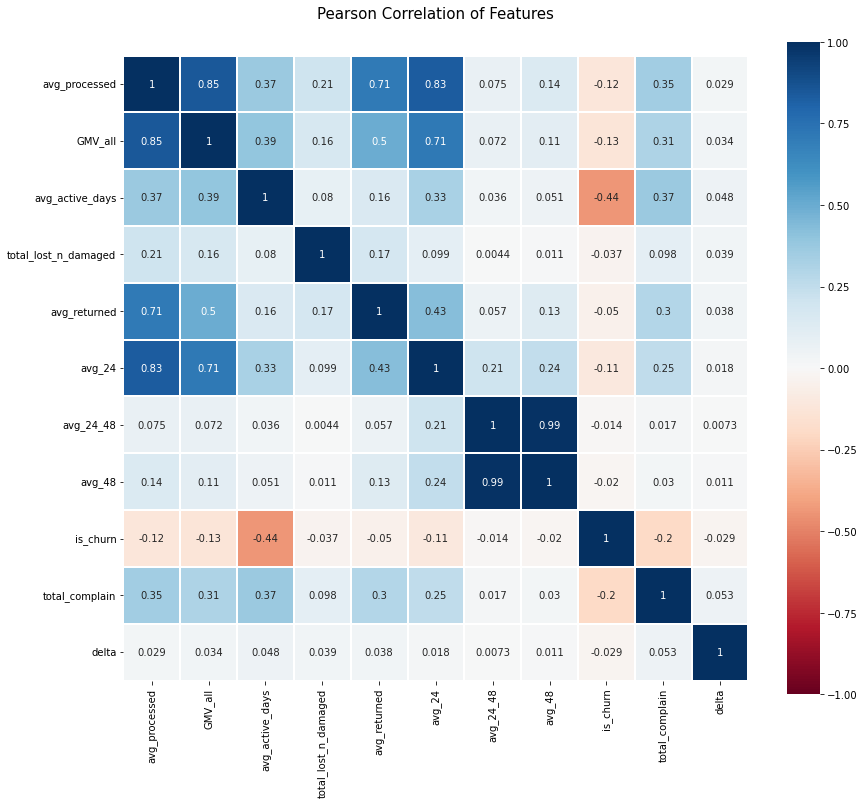

In [8]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,  vmin=-1,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import xgboost


In [10]:
features = ['avg_processed',
 'GMV_all',
 'avg_active_days',
 'total_lost_n_damaged',
 'avg_returned',
 'avg_24',
 'avg_24_48',
 'avg_48',
 'total_complain',
 'delta']

X=df[features]
y=df.is_churn

X_train, X_valid, y_train, y_valid = train_test_split(X, y,random_state=2)

In [11]:
my_model = XGBClassifier(n_estimators=1000)
my_model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], verbose=False)
preds= my_model.predict(X_valid)

C:\Users\Tahsinul Islam\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [12]:
roc_auc_score(y_valid,preds)

0.7224384777576267

In [13]:
feature_importance = pd.DataFrame()
feature_importance["feature"] = X_train[features].columns
feature_importance["importance"] = my_model.feature_importances_

cols=feature_importance.sort_values(by='importance',ascending=False).columns #extracting columns in order of magnitudes

In [17]:
feature_importance

,feature,importance
0,avg_processed,0.075903
1,GMV_all,0.040320
2,avg_active_days,0.618488
3,total_lost_n_damaged,0.000000
4,avg_returned,0.038271
5,avg_24,0.034383
6,avg_24_48,0.025485
7,avg_48,0.036690
8,total_complain,0.092643
9,delta,0.037817


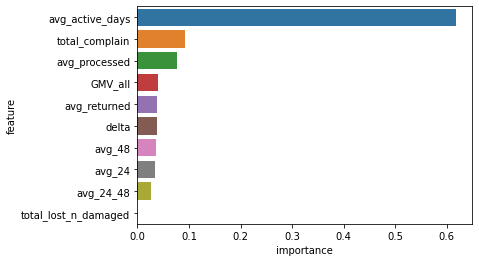

In [14]:
sns.barplot(x='importance',y='feature',data=feature_importance.sort_values(by='importance',ascending=False))
plt.show()

Using Native xgboost api

In [18]:
data_dmatrix = xgboost.DMatrix(data=X,label=y)
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xg_cls = xgboost.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


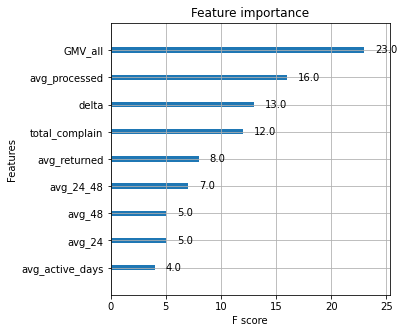

In [19]:
xgboost.plot_importance(xg_cls)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


In [ ]:
--- ignore avg_processed
-- AVG DELTA